In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
# fix random seed for reproducibility
np.random.seed(7)
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
septic_data = pd.read_csv("/content/sample_data/train.csv", header=None, skipinitialspace=True , encoding='utf-8') 
real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
news_data= pd.concat([real_data, septic_data], axis=0)
news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
print(news_data.head(20))
print(real_data.head(20))
print(septic_data.head(20))
labels=news_data[1]
labels.head()     
X = news_data[0]
Y=news_data[1]
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
x_train = x_train.str.replace('\d+', '') # removing all numbers
x_test = x_test.str.replace('\d+', '')
from nltk.corpus import stopwords
stop = stopwords.words('english')
x_train = x_train.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
x_test = x_test.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1  
data = []
punc = '.'
for i in x_train:
    i = i[:-1]
    token = word_tokenize(i)
    if punc in token:
        for index ,val in enumerate(token):
            if punc == val:
                token.pop(index)           
    data.append(token)
x_train = tokenizer.texts_to_sequences(data) 
x_test = tokenizer.texts_to_sequences(x_test)
maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
print(('X_train shape:', x_train.shape))
print(('X_test shape:', x_test.shape))
print(('y_train shape:', y_train.shape))
print(('y_test shape:', y_test.shape))

                                                    0  1
0   The political predicament also appears to be t...  0
1   The CM had planned to meet the duo when he com...  0
2   He’s now scheduled to visit New Delhi on Thurs...  0
3   “If he fails to do so, he would face open rebe...  0
4   “Further delay is likely. Despite threats from...  0
5   “The party should make a concerted effort to i...  0
6   Taking serious note of allegations pertaining ...  0
7   Panchayat raj and mining minister Pedireddy Ra...  0
8   Sources said the party legislator reportedly s...  0
9   The legislator is his report said that large q...  0
10  The legislator claimed that the gravel was ext...  0
11  “The Mandal Parishad Development Officers (MPD...  0
12  He submitted also certain documents to substan...  0
13  “The MPDOs requisitioned for supply of about 8...  0
14  He said that massive illegal mining had not on...  0
15  The legislator said that field level officials...  0
16  Curiously, an MPDO, who is 

In [8]:
# news_data.dropna(axis=0, inplace=True)
# x = news_data[0]
# y = news_data[1]
# x_train , x_test ,y_train ,  y_test = train_test_split(x, y, test_size = 0.1)

In [9]:
# print(len(x_train))
# data = []
# punc = '.'
# for i in x_train:
#     i = i[:-1]
#     token = word_tokenize(i)
#     if punc in token:
#         for index ,val in enumerate(token):
#             if punc == val:
#                 token.pop(index)
        
#     data.append(token)
    
# print(data)  

In [10]:
# tokenizer = Tokenizer(num_words=5000) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
# tokenizer.fit_on_texts(x_train)
# x_train = tokenizer.texts_to_sequences(x_train)
# x_test = tokenizer.texts_to_sequences(x_test)

In [11]:
# maxlen = 100
# x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
# x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
# print(x_train)
# news_data.info()

word_index = tokenizer.word_index
vocab_size=len(word_index)

In [12]:
# from keras import layers

# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model.add(layers.Conv1D(128, 5, activation='relu'))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.fit(x_train, y_train,epochs=10,batch_size=10)
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [13]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()


In [14]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

#LSTM

In [15]:
# Import tensor representations for words

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;
#print(len(coefs))

embeddings_matrix = np.zeros((vocab_size+1, 100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2022-02-13 18:22:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.45.16, 172.217.0.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-02-13 18:22:47 ERROR 404: Not Found.



In [16]:
# from tensorflow.keras import Model, Input
# from tensorflow.keras.layers import LSTM, Embedding, Dense
# from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
# print(x_train.shape)
# model = Sequential()
# input_word = Input(shape=(7026,))
# model = Embedding(input_dim=x_train.shape[0], output_dim=1, input_length=100)(input_word)
# model = SpatialDropout1D(0.1)(model)
# model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
# out = TimeDistributed(Dense(1, activation="sigmoid"))(model)
# model = Model(input_word, out)
# model.summary()
def create_model(x_train, y_train, x_test, y_test):
    num_classes = 1 # y_train.shape[1]
    num_tokens = 100 #x_train.shape[1]
    print(num_classes)
    print(num_tokens)
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim = {{choice([16,32,60, 80, 100])}}, input_length = 100))
    model.add(Dropout({{choice([0.3, 0.4, 0.5, 0.6])}}))
    model.add(Conv1D(filters = {{choice([32,50, 60, 80])}}, kernel_size = {{choice([3,6,10,15,20,30])}}, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPool1D())
    model.add(Dense(num_classes))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer={{choice(['adam', 'sgd'])}},
                  metrics=['acc'])

    # Optional to log output from Keras
    #csv_logger = keras.callbacks.CSVLogger('Logs/dl_model.log')
    
    result = model.fit(x_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=0,
              validation_split=0.1)
    #get the highest validation accuracy of the training epochs
    validation_acc = np.amax(result.history['val_acc']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [17]:
# model.compile(optimizer="adam",
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 100, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
# print(x_train.shape , y_train.shape)

# history = model.fit(
#     x=x_train,
#     y=y_train,
#     epochs=10
# )

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=5, batch_size=100, validation_data=[x_test, y_test])

print("Training Complete")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         22439300  
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, None, 20)          6800      
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                        

[[628   0]
 [532   0]]
              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       628
         1.0       0.00      0.00      0.00       532

    accuracy                           0.54      1160
   macro avg       0.27      0.50      0.35      1160
weighted avg       0.29      0.54      0.38      1160

Accuracy :  0.5413793103448276
Precison :  1.0
Recall :  0.5413793103448276
F1 :  0.7024608501118568


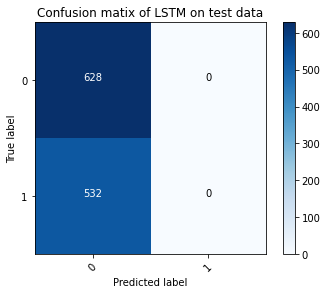

In [19]:
pred=np.round(model.predict(x_test))
print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of LSTM on test data')

In [20]:
# embedding_dim = 50


#Running ML Models

In [29]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [30]:
real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
septic_data = pd.read_csv("/content/sample_data/train.csv", header=None, skipinitialspace=True , encoding='utf-8') 
# septic_data=septic_data.drop(0, axis=1)
# septic_data=septic_data.drop(1, axis=1)
# septic_data.rename(columns = {2: 0, 3: 1}, inplace = True)
real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
news_data= pd.concat([real_data, septic_data], axis=0)
news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
labels=news_data[1]
labels.head()     
X = news_data[0]
Y=news_data[1]
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
x_train = x_train.str.replace('\d+', '') # removing all numbers
x_test = x_test.str.replace('\d+', '')


train=x_train
test=x_test
train = train.map(lambda x: cleantext(str(x)))
test = test.map(lambda x: cleantext(str(x)))
y_train=y_train.astype('int')
y_test=y_test.astype('int')


#SVM

SVM
test:
[[599  29]
 [ 35 497]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       628
           1       0.94      0.93      0.94       532

    accuracy                           0.94      1160
   macro avg       0.94      0.94      0.94      1160
weighted avg       0.94      0.94      0.94      1160

Accuracy :  0.9448275862068966
Precison :  0.944929023084837
Recall :  0.9448275862068966
F1 :  0.9448528750163608


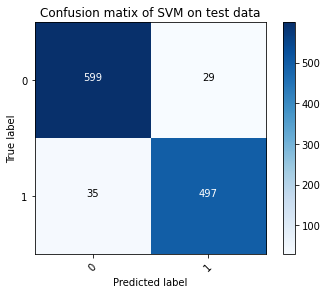

In [31]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(train,y_train)
print('SVM')
print ('test:')
pred=pipeline.predict(test)
print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of SVM on test data')

#Logistic Regression

Logistic Regression
Test:
[[588  40]
 [ 42 490]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       628
           1       0.92      0.92      0.92       532

    accuracy                           0.93      1160
   macro avg       0.93      0.93      0.93      1160
weighted avg       0.93      0.93      0.93      1160

Accuracy :  0.9293103448275862
Precison :  0.9293366432774225
Recall :  0.9293103448275862
F1 :  0.9293207154966704


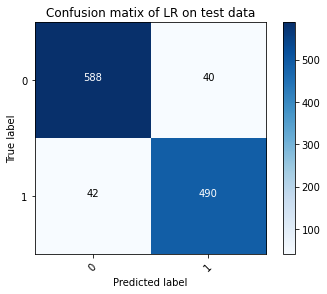

In [32]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(train,y_train)
print('Logistic Regression')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of LR on test data')

#Gradient Boosting Classifier

Gradient Boost
Test:
[[540  88]
 [ 41 491]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       628
           1       0.85      0.92      0.88       532

    accuracy                           0.89      1160
   macro avg       0.89      0.89      0.89      1160
weighted avg       0.89      0.89      0.89      1160

Accuracy :  0.8887931034482759
Precison :  0.8913481093189817
Recall :  0.8887931034482759
F1 :  0.8886024321607312


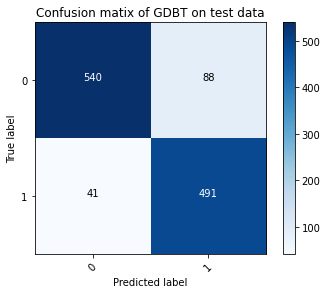

In [33]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Gradient Boost')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of GDBT on test data')

#Decision Tree Classifier

Decision Tree
Test:
[[552  76]
 [ 60 472]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       628
           1       0.86      0.89      0.87       532

    accuracy                           0.88      1160
   macro avg       0.88      0.88      0.88      1160
weighted avg       0.88      0.88      0.88      1160

Accuracy :  0.8827586206896552
Precison :  0.8828722365985247
Recall :  0.8827586206896552
F1 :  0.8826465620236477


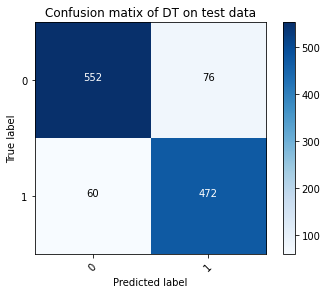

In [34]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Decision Tree')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of DT on test data')

#Random Forest Classifier

Random Forest Classifier
Test:
[[595  33]
 [ 57 475]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       628
           1       0.94      0.89      0.91       532

    accuracy                           0.92      1160
   macro avg       0.92      0.92      0.92      1160
weighted avg       0.92      0.92      0.92      1160

Accuracy :  0.9224137931034483
Precison :  0.9235433466160459
Recall :  0.9224137931034483
F1 :  0.922581647877984


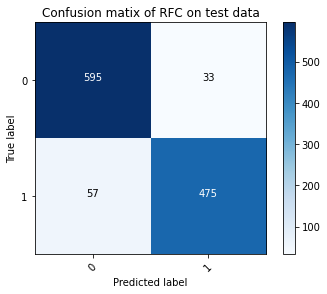

In [35]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', RandomForestClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Random Forest Classifier')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of RFC on test data')